In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts")
from db_utils import read_query_as_df
%matplotlib inline

In [2]:
tickers = ['NVDA', 'AAPL']
placeholder = ', '.join(f"'{t}'" for t in tickers)

In [3]:
query = f"""SELECT * FROM stock_prices WHERE stock in ({placeholder});"""
# Fetch data from the database
plot_data = read_query_as_df(query)

In [4]:
plot_data

,date,close,high,low,open,volume,stock
0,2024-02-01 00:00:00,185.744797,185.834256,182.722947,182.891930,64885400,AAPL
1,2024-02-02 00:00:00,184.740845,186.212008,178.180228,178.786588,102518000,AAPL
2,2024-02-05 00:00:00,186.559906,188.120543,184.730891,187.027102,69668800,AAPL
3,2024-02-06 00:00:00,188.170258,188.180192,185.655358,185.744817,43490800,AAPL
4,2024-02-07 00:00:00,188.279602,189.909814,187.484373,189.502257,53439000,AAPL
...,...,...,...,...,...,...,...
75,2024-03-22 00:00:00,94.258026,94.746864,90.804159,91.111058,586719000,NVDA
76,2024-03-25 00:00:00,94.970787,96.734207,93.479280,93.910139,552136000,NVDA
77,2024-03-26 00:00:00,92.530586,96.343336,92.471608,95.819506,513648000,NVDA
78,2024-03-27 00:00:00,90.220352,93.209368,89.093723,93.081411,586067000,NVDA


In [5]:
plot_data['date'] = pd.to_datetime(plot_data['date'])


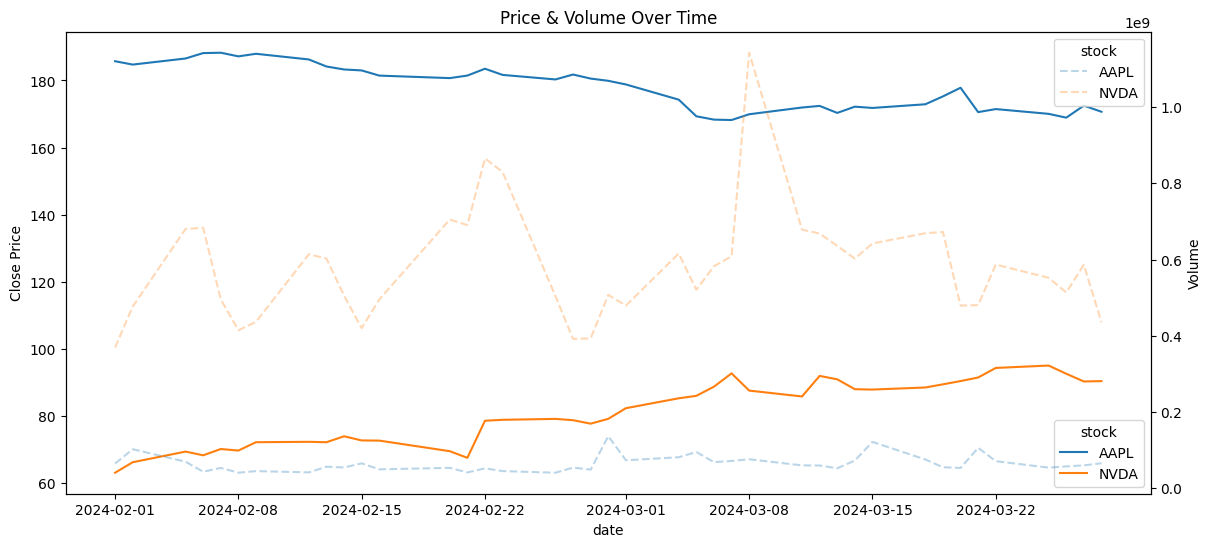

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Price line
sns.lineplot(data=plot_data, x='date', y='close', hue='stock', ax=ax1)
ax1.set_ylabel("Close Price")

# Create second y-axis for volume
ax2 = ax1.twinx()

# Volume line (or area)
sns.lineplot(data=plot_data, x='date', y='volume', hue='stock', ax=ax2, alpha=0.3, linestyle="--")
ax2.set_ylabel("Volume")

plt.title("Price & Volume Over Time")
plt.show()

In [7]:
merged_df = pd.read_csv('candlethrob_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'candlethrob_dataset.csv'

In [ ]:
merged_df.head(5)

,date,close,high,low,open,volume,stock,polarity,subjectivity,daily_return,sentiment_spike,neg_sentiment,vol_spike,day_of_week,sentiment_label,rolling_mean,rolling_std,spike_direction,rolling_sentiment,spike_type
0,2024-02-01,185.744827,185.834287,182.722977,182.891960,64885400,AAPL,0.1875,0.625,NaN,False,False,False,Thursday,Positive,NaN,NaN,NaN,NaN,NaN
1,2024-02-02,184.740829,186.211992,178.180213,178.786573,102518000,AAPL,0.0000,0.000,-0.005405,True,False,False,Friday,Neutral,0.093750,0.132583,NaN,NaN,Sentiment
2,2024-02-05,186.559906,188.120543,184.730891,187.027102,69668800,AAPL,0.0000,0.000,0.009847,False,False,False,Monday,Neutral,0.062500,0.108253,NaN,NaN,NaN
3,2024-02-08,187.196121,188.408826,186.231909,188.259728,40962000,AAPL,0.2500,0.400,0.003410,True,False,False,Thursday,Positive,0.083333,0.144338,Positive Spike,NaN,Sentiment
4,2024-02-29,179.900543,181.711997,178.686276,180.418104,136682600,AAPL,-0.3000,1.000,-0.038973,True,False,False,Thursday,Negative,-0.016667,0.275379,Negative Spike,NaN,Sentiment


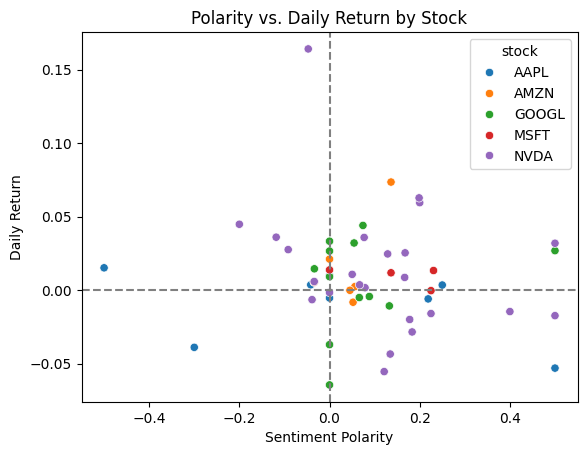

In [ ]:
sns.scatterplot(data=merged_df, x="polarity", y="daily_return", hue="stock")
plt.title("Polarity vs. Daily Return by Stock")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Daily Return")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

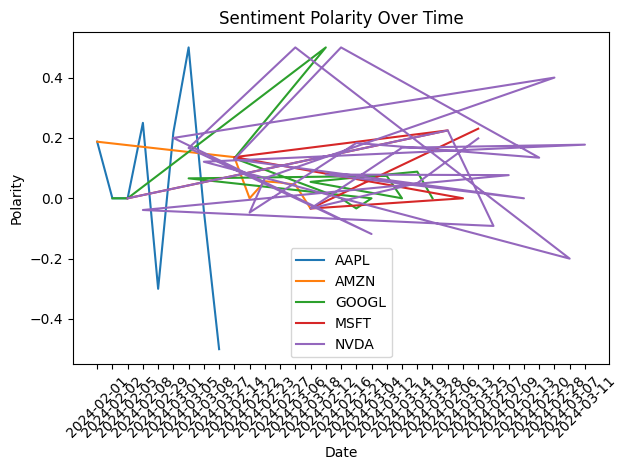

In [ ]:
for stock in merged_df['stock'].unique():
    stock_df = merged_df[merged_df['stock'] == stock]
    plt.plot(stock_df['date'], stock_df['polarity'], label=stock)

plt.legend()
plt.title("Sentiment Polarity Over Time")
plt.xlabel("Date")
plt.ylabel("Polarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

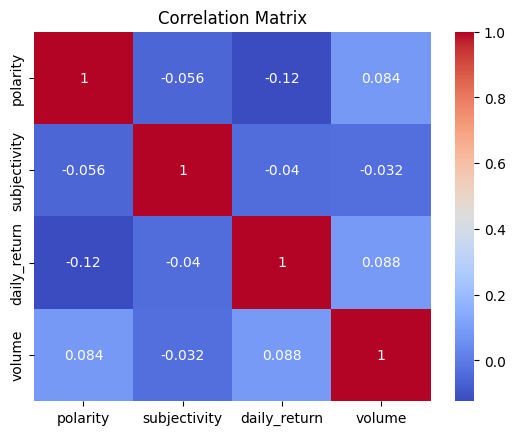

In [ ]:
correlation = merged_df[['polarity', 'subjectivity', 'daily_return', 'volume']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
merged_df['sentiment_label'] = merged_df['polarity'].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")


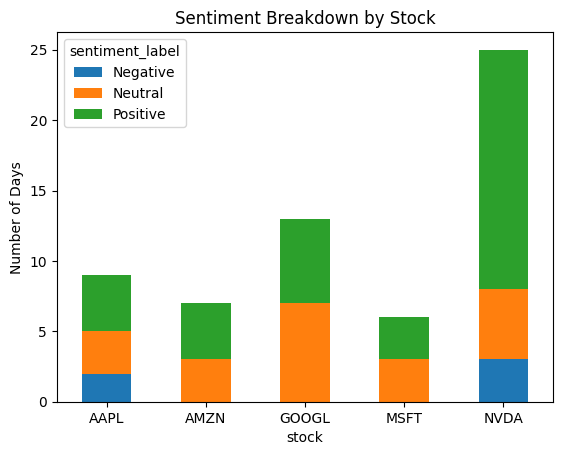

In [ ]:
sentiment_counts = merged_df.groupby(['stock', 'sentiment_label']).size().unstack()
sentiment_counts.plot(kind='bar', stacked=True)
plt.title("Sentiment Breakdown by Stock")
plt.ylabel("Number of Days")
plt.xticks(rotation=0)
plt.show()

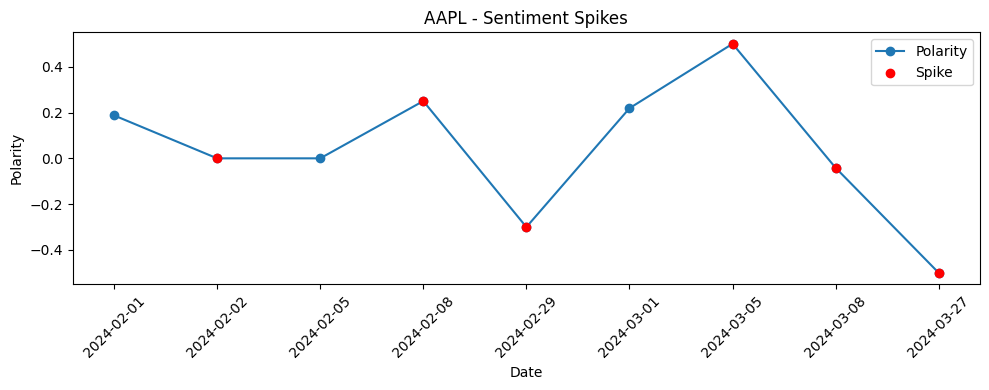

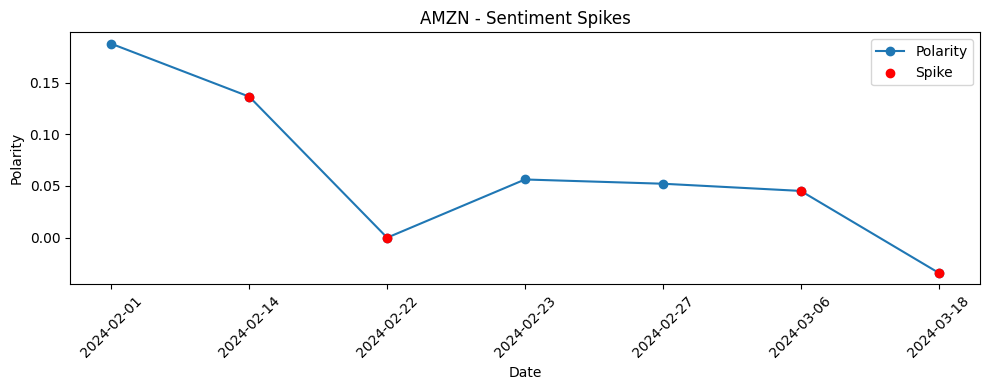

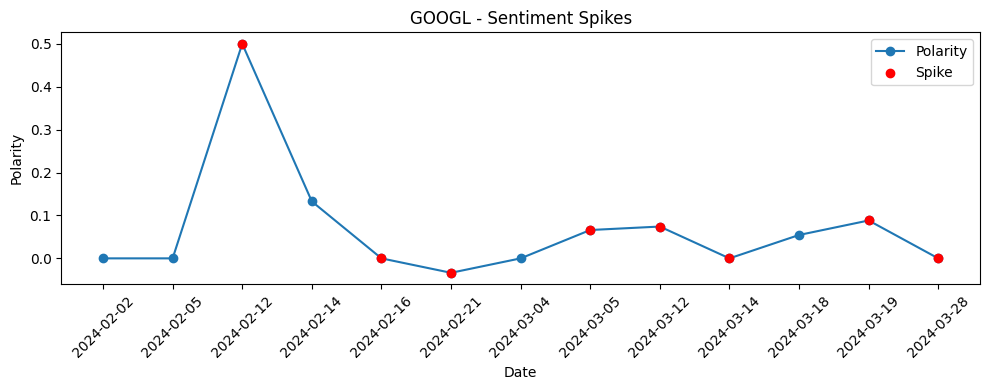

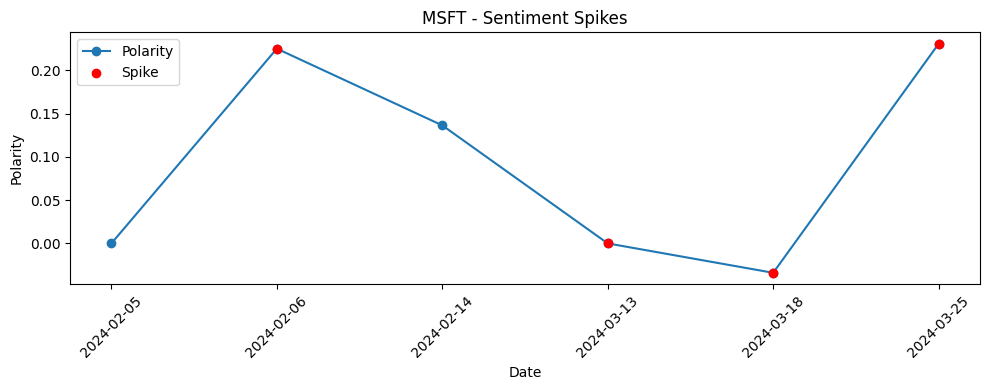

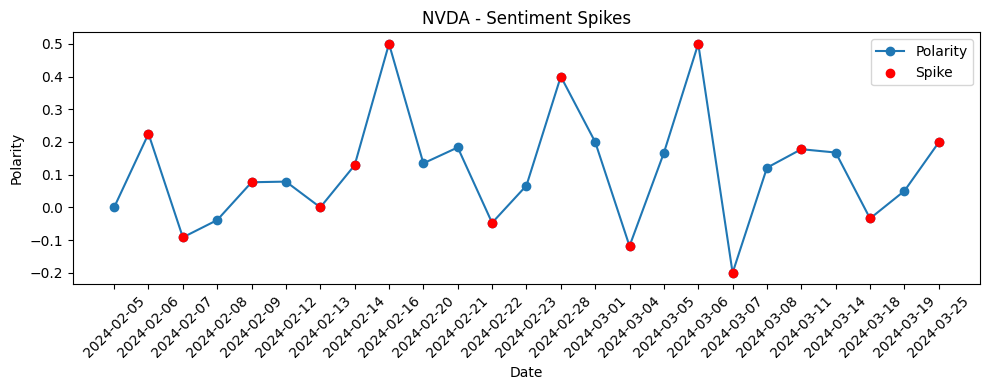

In [ ]:
for stock in merged_df['stock'].unique():
    stock_df = merged_df[merged_df['stock'] == stock]

    plt.figure(figsize=(10, 4))
    plt.plot(stock_df['date'], stock_df['polarity'], label='Polarity', marker='o')
    plt.scatter(stock_df[stock_df['sentiment_spike']]['date'],
                stock_df[stock_df['sentiment_spike']]['polarity'],
                color='red', label='Spike', zorder=5)
    plt.title(f"{stock} - Sentiment Spikes")
    plt.xlabel("Date")
    plt.ylabel("Polarity")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
